# Deep Learning - Máster in Artificial Intelligence (UDC)
## Amazon Reviews Sentiment Classification using RNNs - 
Date: 24/04/2025

Authors:

Paula Biderman Mato

Celia Hermoso Soto

# Introduction
In this part of the practice, the main objective is to build and evaluate different Recurrent Neural Networks (RNNs) for text classification. The dataset used consists of Amazon customer reviews, labeled with positive or negative sentiment. The goal is to train deep learning models that can accurately predict whether a review is positive (4 or 5 stars) or negative (1 or 2 stars).

As we have seen throughout this subject, RNNs are a powerful type of deep learning architecture especially suited for sequential data such as text. They are able to capture temporal dependencies by maintaining a hidden state that is passed through time. In this practice, we use three RNN-based architectures: a simple RNN, an LSTM, and a bidirectional LSTM. These models are trained on a preprocessed version of the Amazon reviews dataset using Keras.

Unlike CNNs in image classification, text classification problems require models that understand the sequential nature of language. RNNs, and in particular LSTMs, are designed to capture such dependencies, which makes them an appropriate choice for this task. In this notebook, we compare the performance of each architecture in terms of classification accuracy.

To reuse functions and code outside a Jupyter environment, the notebook can be converted into a Python script using the nbconvert tool. This is particularly useful when we want to organize reusable components, such as data preprocessing or model definitions, into importable modules. The conversion is done with a single command: *!jupyter nbconvert --to script generateAmazonDataset.ipynb*
This command transforms the notebook into a .py file by extracting all code cells and converting markdown cells into Python comments. The resulting script can then be edited, imported into other projects, or executed directly as a standalone Python program.

In [31]:
!jupyter nbconvert --to script generateAmazonDataset.ipynb

[NbConvertApp] Converting notebook generateAmazonDataset.ipynb to script
[NbConvertApp] Writing 2351 bytes to generateAmazonDataset.py


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from generateAmazonDataset import readData, transformData
import matplotlib.pyplot as plt

# Load dataset
We use the script provided by the instructors to load the dataset: generateAmazonDataset.ipynb. It contains two functions: readData and transformData. The readData function returns the training and test sets in raw text format, along with their binary sentiment labels. __label__1 corresponds to negative reviews (1 or 2 stars) and __label__2 to positive reviews (4 or 5 stars). Neutral reviews (3 stars) have been excluded.


In [3]:
# Read the data and parse it from the files
x_train, y_train, seqLength = readData("amazon/train_small.txt")
x_test, y_test, tmp = readData("amazon/test_small.txt")

#maxFeatures is a hyperparameter
maxFeatures = 20000

# Data Preparation and Splitting
In this step, we use a preprocessed version of the Amazon reviews dataset. The text has already been transformed into sequences of integers, where each integer corresponds to a word from a limited vocabulary of size maxFeatures, and each sequence is padded or truncated to a fixed length defined by seqLength.

After loading the training and testing sets using transformData, we split the original test set into two parts:

The first 50% (x_test_split, y_test_split) will be used as the actual test set for final evaluation of the model after training.

The remaining 50% (x_val_split, y_val_split) will be used as a validation set during training to monitor the model's performance and detect overfitting.

This ensures a clean separation between training, validation, and testing data, allowing us to reliably evaluate how well the model generalizes.


In [4]:
# Split the data into training and testing
x_train_int, y_train, x_test_int, y_test = transformData(x_train, y_train, x_test, y_test, 
maxFeatures, seqLength)

testPercentage = 0.5
testIndex = int(testPercentage * len(x_test_int))

x_test_split = x_test_int[:testIndex]
y_test_split = y_test[:testIndex]

x_val_split = x_test_int[testIndex:]
y_val_split = y_test[testIndex:]

In [5]:
# We print the number of samples in each set to confirm the data has been correctly loaded.
print(f"Samples in training set: {len(x_train_int)}")
print(f"Samples in test set: {len(x_test_split)}")
print(f"Samples in validation set: {len(x_val_split)}")

Samples in training set: 25000
Samples in test set: 12500
Samples in validation set: 12500


After preprocessing, each input review is represented as a sequence of integers of fixed length, where each integer corresponds to a token (word) from the vocabulary. These numerical sequences are now ready to be used as input for training neural networks.

# Build Model 1: SimpleRNN
The first model uses a SimpleRNN layer, which is the most basic form of recurrent neural network. It maintains a hidden state that is updated step-by-step as it processes each word in the sequence. This allows the model to learn short-term dependencies in the text. However, SimpleRNN networks can struggle to capture long-term patterns due to the vanishing gradient problem, which will be addressed in later models using LSTM.

Architecture overview:
* Embedding layer: Converts integer word indices into dense vectors of size 64 (embedding_dim). For each input review of length seqLength, the output is a 2D matrix of shape (seqLength, 64).
* SimpleRNN layer: Processes the embedded sequence one time step at a time and returns the final hidden state.
* Dense layer: A single output neuron with a sigmoid activation function, which outputs a probability between 0 and 1 — suitable for binary classification (positive or negative review).

The model is trained using the integer-encoded training data (x_train_int, y_train) and validated on a hold-out validation set (x_val_split, y_val_split). This allows monitoring of the model’s generalization performance during training.




In [36]:
embedding_dim = 64

model_rnn = keras.Sequential([
    layers.Embedding(maxFeatures, embedding_dim, input_length=seqLength),
    layers.SimpleRNN(64),
    layers.Dense(1, activation='sigmoid')
])

model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_rnn = model_rnn.fit(
    x_train_int, y_train,
    validation_data=(x_val_split, y_val_split),
    epochs=5,
    batch_size=64
)

Epoch 1/5


c:\Users\paulabiderman\anaconda3\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.5003 - loss: 0.6981 - val_accuracy: 0.5005 - val_loss: 0.7170
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.5128 - loss: 0.6951 - val_accuracy: 0.5041 - val_loss: 0.6994
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.5057 - loss: 0.6945 - val_accuracy: 0.5032 - val_loss: 0.6942
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.5273 - loss: 0.6915 - val_accuracy: 0.5039 - val_loss: 0.6931
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.5260 - loss: 0.6906 - val_accuracy: 0.5025 - val_loss: 0.6932


The first model uses a SimpleRNN layer, implemented with a functional Keras API (Input, Model). This is the most basic type of recurrent neural network, where the hidden state is updated at each time step as the model processes the input sequence. This mechanism allows the network to learn short-term dependencies in the text. However, due to the vanishing gradient problem, SimpleRNN can struggle to retain information over long sequences, a limitation that will be addressed in later models using LSTM.

Architecture overview:
* Input layer: Accepts sequences of fixed length (seqLength) composed of integer-encoded tokens.
Embedding layer: Transforms each integer into a dense vector of size 64 (embedding_dim). The output is a 2D matrix of shape (seqLength, 64) per input.
* SimpleRNN layer: Processes the embedded sequence one time step at a time and outputs the final hidden state.
* Dense layer: A single neuron with sigmoid activation that outputs a probability between 0 and 1 for binary classification.

The model is compiled using the adam optimizer and trained with binary_crossentropy loss, suitable for binary sentiment classification. Training is performed on x_train_int and y_train, while performance is monitored on a validation split (x_val_split, y_val_split) using an EarlyStopping callback to prevent overfitting. After training, the model is evaluated on the final test set (x_test_split, y_test_split).

In [29]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Modelo SimpleRNN
inputs_rnn = Input(shape=(seqLength,))
x_rnn = Embedding(input_dim=maxFeatures, output_dim=64, mask_zero=True)(inputs_rnn)
x_rnn = SimpleRNN(64)(x_rnn)
outputs_rnn = Dense(1, activation='sigmoid')(x_rnn)
model_rnn2 = Model(inputs_rnn, outputs_rnn)

model_rnn2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_rnn2 = model_rnn2.fit(
    x_train_int, y_train,
    validation_data=(x_val_split, y_val_split),
    epochs=40,
    batch_size=32,
    callbacks=[early_stop]
)

print("SimpleRNN evaluation:", model_rnn2.evaluate(x_test_split, y_test_split, verbose=0))


Epoch 1/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.5799 - loss: 0.6639 - val_accuracy: 0.6997 - val_loss: 0.5959
Epoch 2/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.7324 - loss: 0.5317 - val_accuracy: 0.7086 - val_loss: 0.5567
Epoch 3/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 51s 66ms/step - accuracy: 0.8236 - loss: 0.3977 - val_accuracy: 0.7413 - val_loss: 0.5451
Epoch 4/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 67ms/step - accuracy: 0.8523 - loss: 0.3418 - val_accuracy: 0.7310 - val_loss: 0.5848
Epoch 5/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 20ms/step - accuracy: 0.9218 - loss: 0.2051 - val_accuracy: 0.7314 - val_loss: 0.6823
Epoch 6/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9561 - loss: 0.1232 - val_accuracy: 0.7216 - val_loss: 0.7559
Epoch 7/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.9735 - loss: 0.0793 - val_accuracy: 0.7458 - val_loss: 0.8497
Epoch 8/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9820 - loss: 0.0526 - 

## Exploration of Parameters in SimpleRNN: Varying Embedding Size, RNN Neurons, and Vocabulary Size
In this experiment, different configurations of key parameters in the SimpleRNN model were explored to assess their impact on performance. The parameters varied include:

* Embedding size (embedding_dim): The number of dimensions used to represent words in the embedding space. Three sizes were tested: 8, 16, and 32.
* Number of RNN neurons (rnn_units): The number of units in the recurrent layer. Two configurations were evaluated: 32 and 64.
* Vocabulary size (maxFeatures): The maximum number of words considered in the vocabulary. Two sizes were tested: 20,000 and 50,000.

The choice of these parameters was based on the need to find an appropriate representation for the words in the data, control the model's capacity to avoid overfitting, and improve generalization performance.

### Model Architecture
The model used in this experiment is a basic recurrent neural network (SimpleRNN) with the following components:

* Embedding Layer: Converts words in integer form (tokens) into dense vectors of size embedding_dim.
* RNN Layer: The recurrent layer uses the number of neurons (rnn_units) to learn temporal dependencies in the text sequence.
* Dense Layer: A single output neuron with a sigmoid activation function for binary classification.

The model was trained using the Adam optimizer and binary_crossentropy loss function.

### Training and Evaluation Process
Models were trained with different combinations of embedding size, RNN units, and vocabulary size. The training process was stopped early using the EarlyStopping callback to prevent overfitting and save the model with the best performance on the validation set.

Each model was trained for 40 epochs with a batch size of 32. Accuracy and loss on the test set (x_test_split, y_test_split) were recorded after the training for each model.

In [33]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import matplotlib.pyplot as plt

# config to test
embedding_dims = [8, 16, 32, 64]
rnn_units = [16, 32, 64]
max_features_list = [20000, 50000]

# save results
results = []
histories = {}

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

for maxFeatures in max_features_list:
    for emb_dim in embedding_dims:
        for units in rnn_units:
            print(f"Training SimpleRNN with embedding_dim={emb_dim}, units={units}, maxFeatures={maxFeatures}")

            # model
            inputs = Input(shape=(seqLength,))
            x = Embedding(input_dim=maxFeatures, output_dim=emb_dim, mask_zero=True)(inputs)
            x = SimpleRNN(units)(x)
            outputs = Dense(1, activation='sigmoid')(x)
            model = Model(inputs, outputs)

            model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

            history = model.fit(
                x_train_int, y_train,
                validation_data=(x_val_split, y_val_split),
                epochs=40,
                batch_size=32,
                callbacks=[early_stop],
                verbose=1
            )

            loss, acc = model.evaluate(x_test_split, y_test_split, verbose=0)
            config_name = f"Embed{emb_dim}_RNN{units}_MaxFeat{maxFeatures}"
            print(f" {config_name} : Accuracy: {acc:.4f} | Loss: {loss:.4f}")

            results.append({
                "Embedding Size": emb_dim,
                "RNN Neurons": units,
                "MaxFeatures": maxFeatures,
                "Test Accuracy": acc,
                "Test Loss": loss
            })

            histories[config_name] = history


Training SimpleRNN with embedding_dim=8, units=16, maxFeatures=20000
Epoch 1/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.6325 - loss: 0.6340 - val_accuracy: 0.8050 - val_loss: 0.4703
Epoch 2/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.8331 - loss: 0.4112 - val_accuracy: 0.8446 - val_loss: 0.3932
Epoch 3/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.8788 - loss: 0.2957 - val_accuracy: 0.8601 - val_loss: 0.3354
Epoch 4/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.9398 - loss: 0.1762 - val_accuracy: 0.8591 - val_loss: 0.3479
Epoch 5/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.9565 - loss: 0.1286 - val_accuracy: 0.8519 - val_loss: 0.5262
Epoch 6/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.9673 - loss: 0.1006 - val_accuracy: 0.8567 - val_loss: 0.4620
Epoch 7/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.9741 - loss: 0.0829 - val_accuracy: 0.8486 - val_loss: 0.4913
Epoch 8/40
782/782 ━━

In [34]:
df_rnn = pd.DataFrame(results).sort_values(by="Test Accuracy", ascending=False)
print(df_rnn)
df_rnn.to_csv("results_simpleRNN_embeddings.csv", index=False)


    Embedding Size  RNN Neurons  MaxFeatures  Test Accuracy  Test Loss
7               32           32        20000        0.86728   0.325370
3               16           16        20000        0.86392   0.331991
0                8           16        20000        0.86240   0.330021
2                8           64        20000        0.85064   0.384341
18              32           16        50000        0.84720   0.367025
22              64           32        50000        0.84680   0.413657
21              64           16        50000        0.84480   0.366855
9               64           16        20000        0.84416   0.375627
15              16           16        50000        0.84088   0.397212
4               16           32        20000        0.83784   0.370706
14               8           64        50000        0.83688   0.408563
10              64           32        20000        0.83056   0.397016
23              64           64        50000        0.82456   0.412255
13    

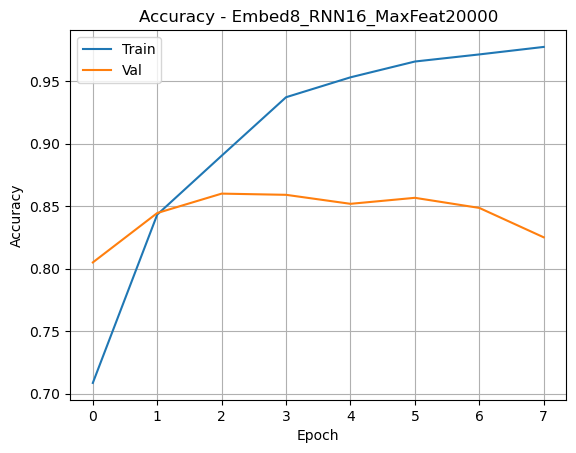

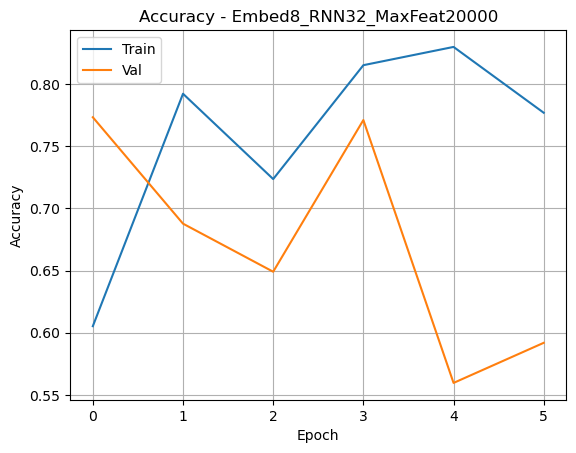

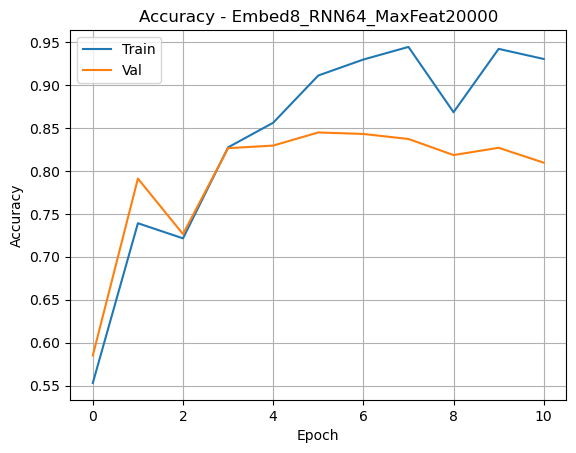

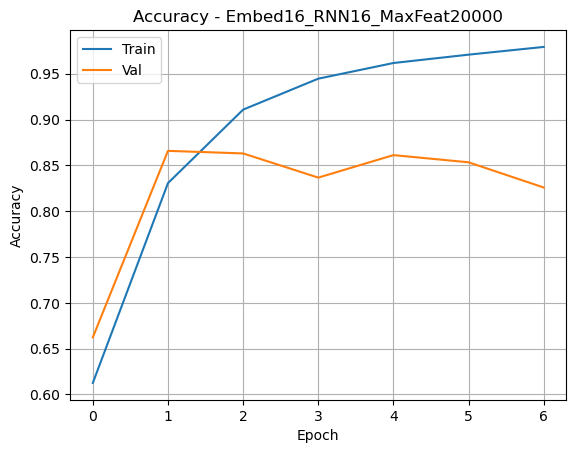

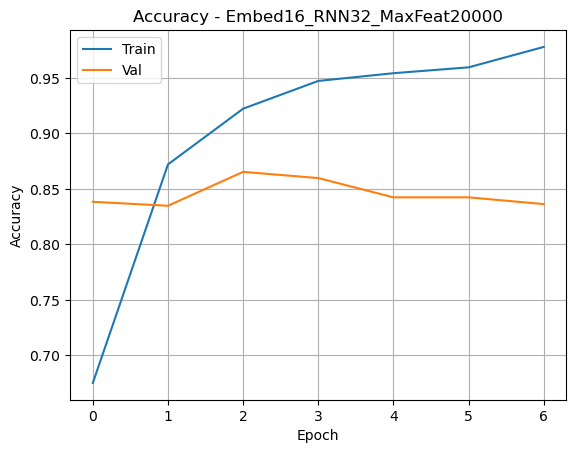

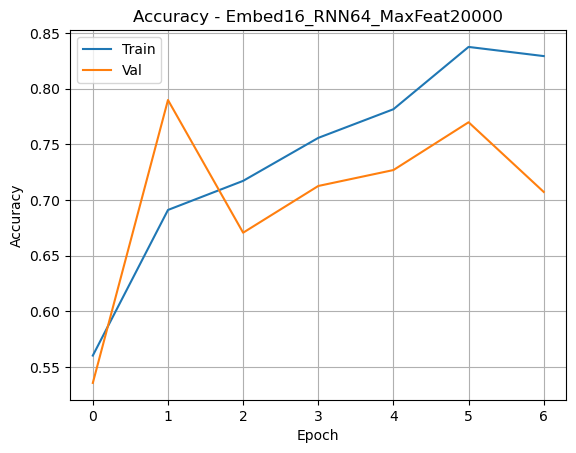

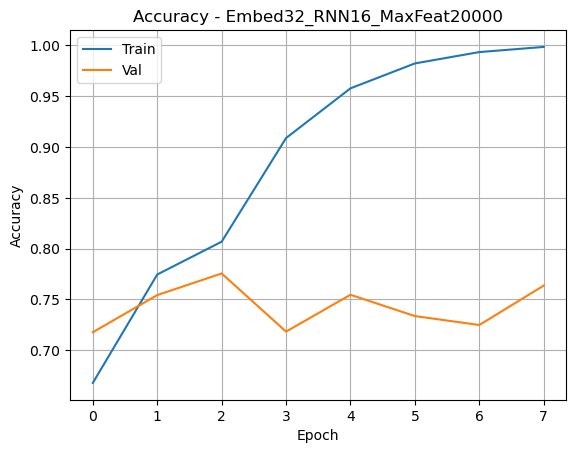

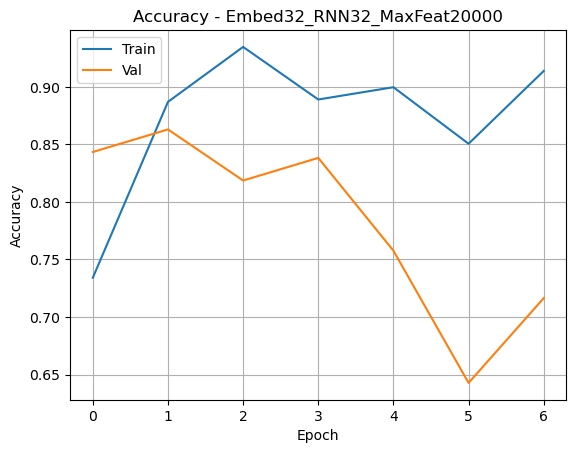

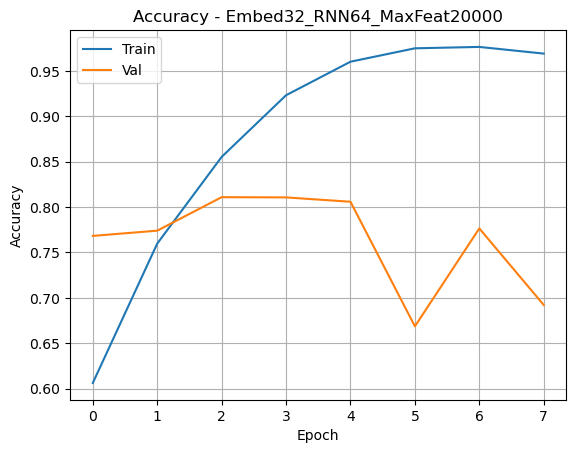

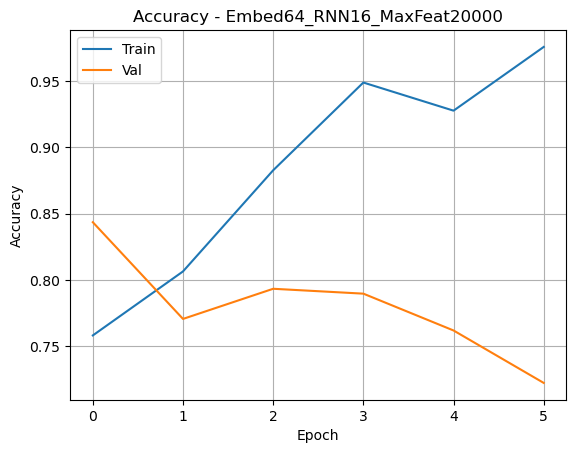

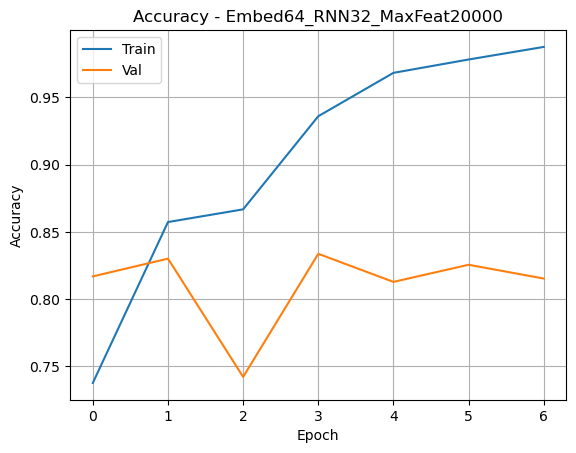

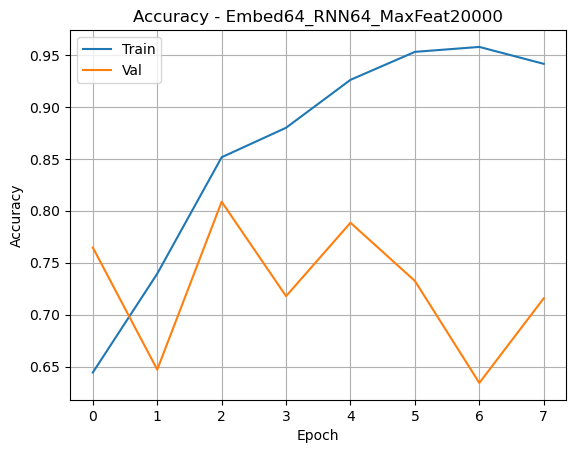

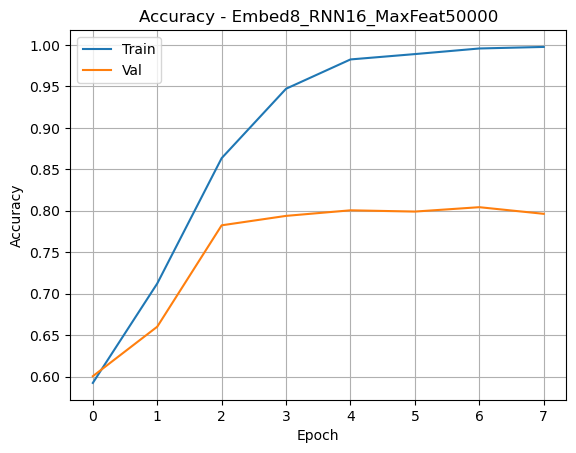

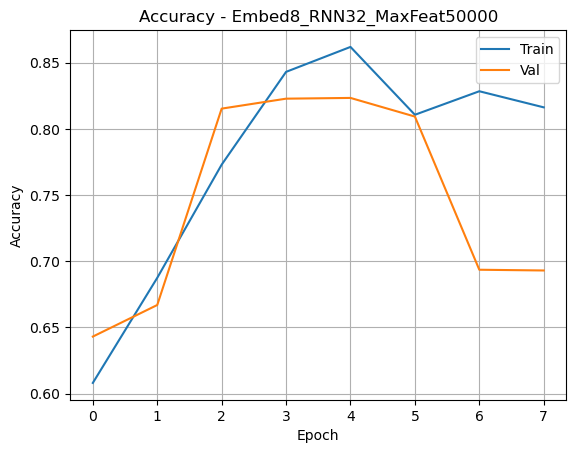

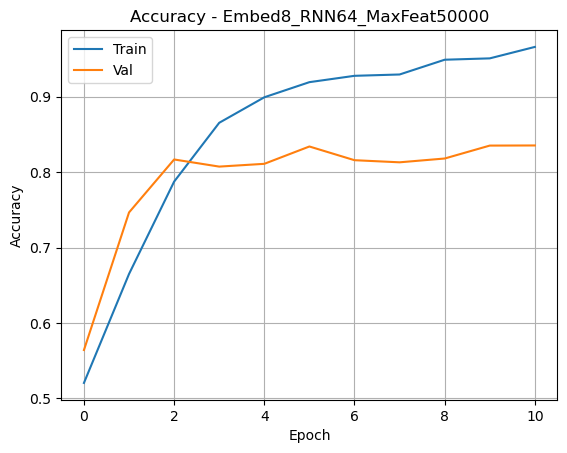

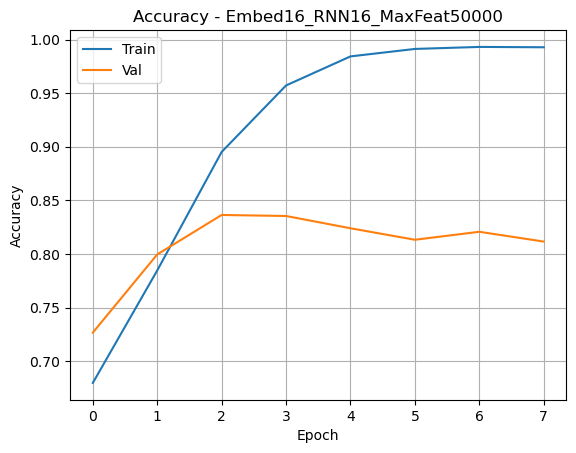

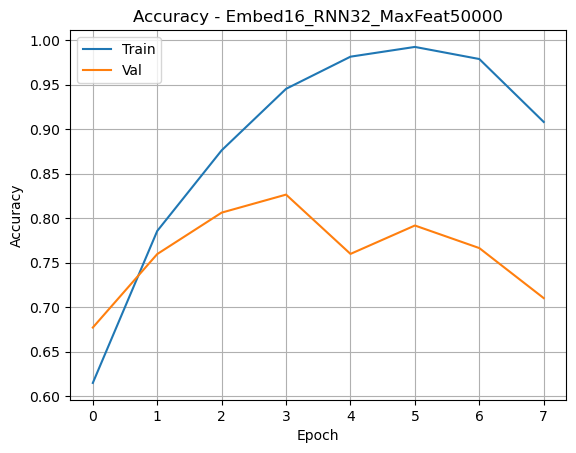

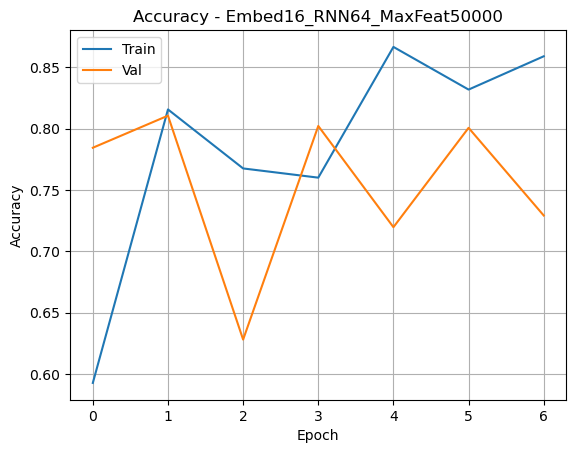

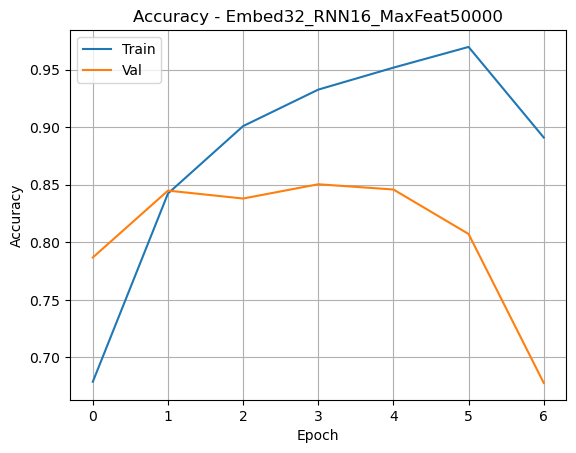

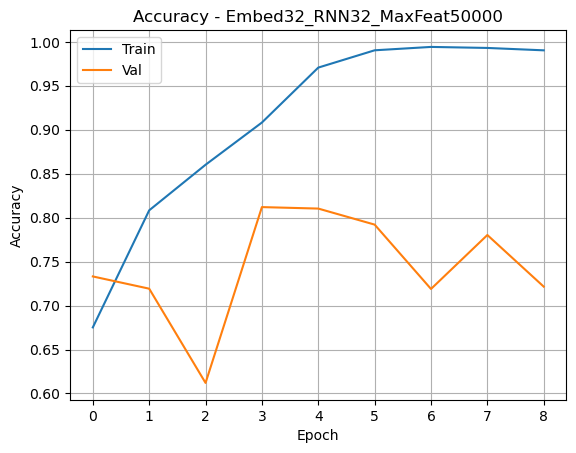

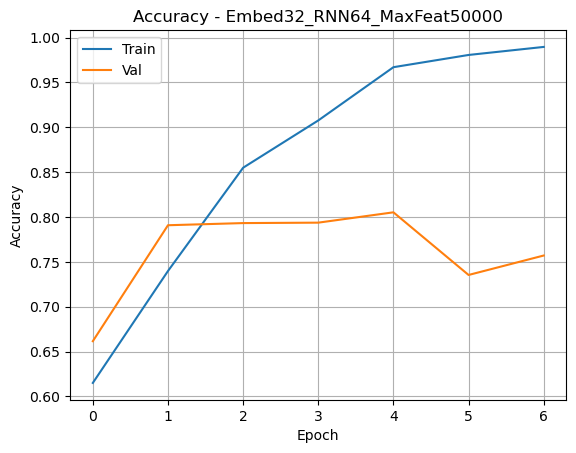

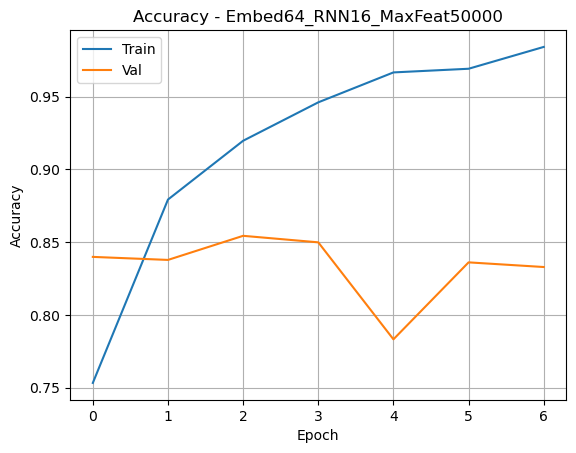

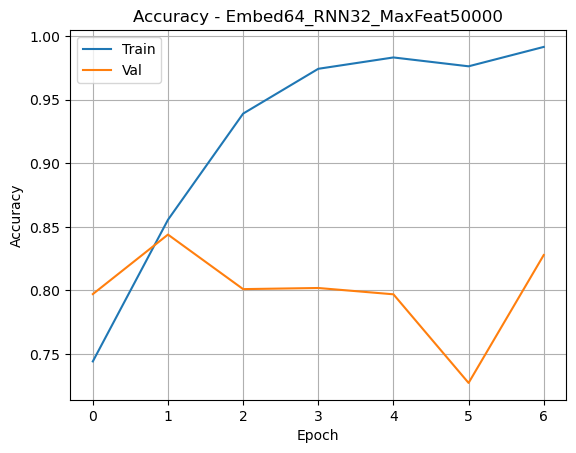

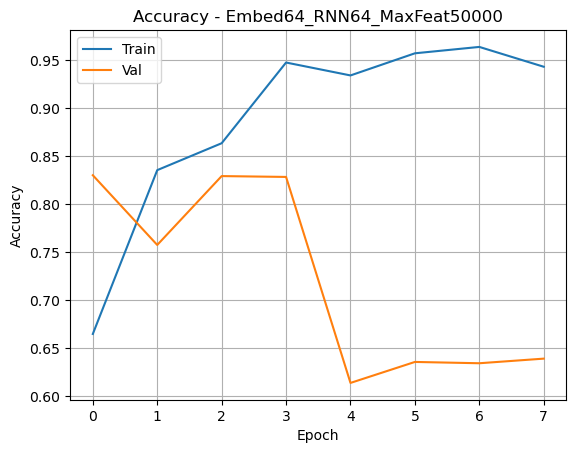

In [36]:
def plot_history(history, title):
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Val')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend()
    plt.show()

# plot
for name, hist in histories.items():
    plot_history(hist, f"Accuracy - {name}")


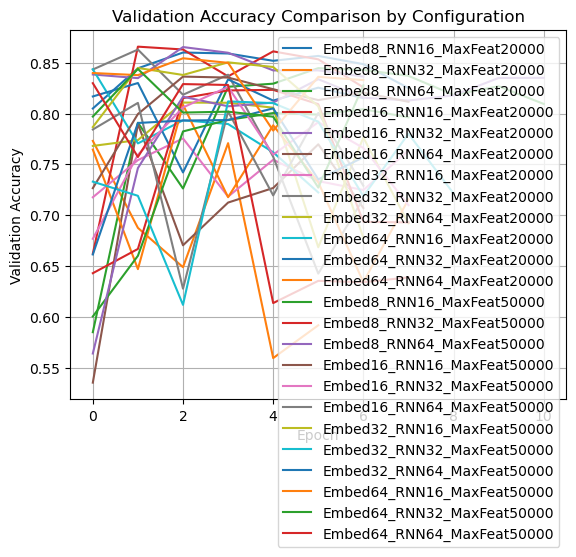

In [37]:
import matplotlib.pyplot as plt

# Plotting validation accuracy for different configurations
for config_name, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=f'{config_name}')
    
plt.title("Validation Accuracy Comparison by Configuration")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()


#### Key Observations
*Best Performance*
The highest test accuracy is 0.86728 with embedding_dim=32, rnn_units=32, and maxFeatures=20000, followed closely by 0.86392 at embedding_dim=16, rnn_units=16, and maxFeatures=20000. These configurations provided a good balance between model complexity and performance.

*Effect of Embedding Size*
As expected, the larger embedding sizes (16 and 32) seem to perform better compared to smaller ones (like 8). This indicates that having richer word representations helps the model learn better patterns.
The performance seems to stabilize with an embedding size of 16 or 32, meaning the smaller size (8) didn't help the model generalize as well, resulting in lower accuracy.

*Effect of RNN Neurons*
Increasing the number of neurons in the RNN layer does not necessarily guarantee better performance. For example, increasing from 16 to 64 neurons in embedding_dim=16 did not consistently improve accuracy.
The best performance in terms of accuracy often comes from configurations with 32 neurons in the RNN layer.

*Max Features Impact*
Increasing the vocabulary size from 20,000 to 50,000 does not always improve performance. In fact, some configurations with 20,000 features outperformed those with 50,000. This suggests that adding too many features might not always improve performance and could potentially lead to overfitting.

#### Conclusions
From this experiment, it is evident that the best performance is generally achieved by using embedding sizes of 16 or 32, coupled with 32 or 64 RNN neurons. Increasing the maxFeatures to 50,000 does not always yield better results and can cause a slight increase in test loss, likely due to overfitting.

# Build Model 2: LSTM + Dropout
The second model builds on the limitations of SimpleRNN by using a Long Short-Term Memory (LSTM) layer, which is specifically designed to better capture long-term dependencies in sequences. LSTM cells incorporate mechanisms (gates) that control the flow of information, allowing the network to retain important features over longer time spans. This makes them particularly effective for text classification tasks.

Architecture overview:
* Embedding layer: Converts each word index into a dense vector of size embedding_dim = 64. The input shape is (seqLength, 64) per review.
* LSTM layer: Processes the sequence and returns the final hidden state, capturing both short- and long-term patterns in the text.
* Dropout layer: A regularization layer that randomly deactivates 50% of the neurons during training. This helps prevent overfitting.
* Dense output layer: A single sigmoid-activated neuron that outputs a probability for binary sentiment classification (positive vs. negative).

The model is trained on the integer-encoded reviews (x_train_int, y_train) and evaluated on a validation set (x_val_split, y_val_split). This setup allows us to monitor how well the model generalizes during training.



In [38]:
model_lstm = keras.Sequential([
    layers.Embedding(maxFeatures, embedding_dim, input_length=seqLength),
    layers.LSTM(64, return_sequences=False),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_lstm = model_lstm.fit(
    x_train_int, y_train,
    validation_data=(x_val_split, y_val_split),
    epochs=5,
    batch_size=64
)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 55ms/step - accuracy: 0.5123 - loss: 0.6930 - val_accuracy: 0.5217 - val_loss: 0.6923
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 56ms/step - accuracy: 0.5150 - loss: 0.6928 - val_accuracy: 0.5232 - val_loss: 0.6928
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.5234 - loss: 0.6917 - val_accuracy: 0.5242 - val_loss: 0.6923
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.5181 - loss: 0.6871 - val_accuracy: 0.5283 - val_loss: 0.6984
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.5424 - loss: 0.6741 - val_accuracy: 0.5388 - val_loss: 0.6945


In [39]:
from tensorflow.keras.layers import LSTM, Dropout

# Modelo LSTM
inputs_lstm = Input(shape=(seqLength,))
x_lstm = Embedding(input_dim=maxFeatures, output_dim=64, mask_zero=True)(inputs_lstm)
x_lstm = LSTM(64, recurrent_dropout=0.3)(x_lstm)
x_lstm = Dropout(0.3)(x_lstm)
outputs_lstm = Dense(1, activation='sigmoid')(x_lstm)
model_lstm2 = Model(inputs_lstm, outputs_lstm)

model_lstm2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_lstm2 = model_lstm2.fit(
    x_train_int, y_train,
    validation_data=(x_val_split, y_val_split),
    epochs=40,
    batch_size=32,
    callbacks=[early_stop]
)

print("LSTM evaluation:", model_lstm2.evaluate(x_test_split, y_test_split, verbose=0))


Epoch 1/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 83ms/step - accuracy: 0.7173 - loss: 0.5597 - val_accuracy: 0.7094 - val_loss: 0.5515
Epoch 2/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 87ms/step - accuracy: 0.8481 - loss: 0.3665 - val_accuracy: 0.8558 - val_loss: 0.3804
Epoch 3/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 91ms/step - accuracy: 0.8779 - loss: 0.3121 - val_accuracy: 0.8097 - val_loss: 0.4584
Epoch 4/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 90ms/step - accuracy: 0.8756 - loss: 0.3195 - val_accuracy: 0.8287 - val_loss: 0.3971
Epoch 5/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.8874 - loss: 0.2812 - val_accuracy: 0.8381 - val_loss: 0.3783
Epoch 6/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 89ms/step - accuracy: 0.9226 - loss: 0.2068 - val_accuracy: 0.8530 - val_loss: 0.3703
Epoch 7/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 84ms/step - accuracy: 0.9293 - loss: 0.1928 - val_accuracy: 0.8571 - val_loss: 0.3844
Epoch 8/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 83ms/step - accuracy: 0.9528 - loss: 0.1365 - 

## Exploration of Parameters in LSTM + Dropout: Varying Embedding Size, LSTM Neurons, and Regularization
In this experiment, we explored how different configurations of key parameters affect the performance of the LSTM model, specifically focusing on:
* _Embedding Size (embedding_dim):_ This parameter determines the dimensionality of the word vectors used to represent each word in the dataset. We varied it across three values: 8, 16, and 32, to observe how the size of the word embeddings affects the model's ability to capture semantic relationships in the text.
* _LSTM Units (LSTM_units):_ This parameter controls the number of units in the LSTM layer. By testing 32 and 64 units, we aimed to analyze the effect of model complexity on performance, with more units potentially allowing the model to capture more intricate temporal dependencies in the data.
* _Recurrent Dropout (recurrent_dropout)_: This parameter applies dropout to the recurrent connections within the LSTM layer. Varying recurrent_dropout (values of 0.3 and 0.5) helps prevent overfitting by randomly dropping out a fraction of the recurrent connections during training.
* _Dropout Rate (Dropout_rate)_: Standard dropout regularization applied after the LSTM layer to prevent overfitting. By varying the dropout rate (0.3 and 0.5), we tested how much regularization the model needs to generalize well without underfitting.

The goal was to understand how these parameters influence model accuracy and loss, and to identify the best combination for optimizing the LSTM model's performance.

In [2]:
from tensorflow.keras.layers import LSTM, Dropout, Embedding, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import matplotlib.pyplot as plt

# Parameters to test
embedding_dims = [8, 16, 32, 64]
lstm_units = [32, 64]
dropout_rates = [0.3, 0.5]
recurrent_dropouts = [0.3, 0.5]
max_features_list = [20000, 50000]  # Vocabulary size options

# Save results
results = []
histories = {}

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

for maxFeatures in max_features_list:
    for emb_dim in embedding_dims:
        for units in lstm_units:
            for drop_rate in dropout_rates:
                for rec_dropout in recurrent_dropouts:
                    print(f"\n Training LSTM with embedding_dim={emb_dim}, lstm_units={units}, "
                          f"dropout_rate={drop_rate}, recurrent_dropout={rec_dropout}, maxFeatures={maxFeatures}")

                    # Model architecture
                    inputs_lstm = Input(shape=(seqLength,))
                    x_lstm = Embedding(input_dim=maxFeatures, output_dim=emb_dim, mask_zero=True)(inputs_lstm)
                    x_lstm = LSTM(units, recurrent_dropout=rec_dropout)(x_lstm)
                    x_lstm = Dropout(drop_rate)(x_lstm)
                    outputs_lstm = Dense(1, activation='sigmoid')(x_lstm)
                    model_lstm = Model(inputs_lstm, outputs_lstm)

                    model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

                    # Train the model
                    history = model_lstm.fit(
                        x_train_int, y_train,
                        validation_data=(x_val_split, y_val_split),
                        epochs=40,
                        batch_size=32,
                        callbacks=[early_stop],
                        verbose=1  # see the training progress
                    )

                    # Save the results
                    loss, acc = model_lstm.evaluate(x_test_split, y_test_split, verbose=0)
                    config_name = f"Embed{emb_dim}_LSTM{units}_Drop{drop_rate}_RecDrop{rec_dropout}_MaxFeat{maxFeatures}"
                    print(f"{config_name} : Accuracy: {acc:.4f} | Loss: {loss:.4f}")

                    results.append({
                        "Embedding Size": emb_dim,
                        "LSTM Neurons": units,
                        "Dropout Rate": drop_rate,
                        "Recurrent Dropout": rec_dropout,
                        "MaxFeatures": maxFeatures,
                        "Test Accuracy": acc,
                        "Test Loss": loss
                    })

                    histories[config_name] = history

# Create DataFrame with the results
df_results = pd.DataFrame(results).sort_values(by="Test Accuracy", ascending=False)
print(df_results)

# Save results to CSV
df_results.to_csv("lstm_embedding_neurons_dropout_results.csv", index=False)

# Plot the validation accuracy of all models
for config_name, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=f'{config_name}')
    
plt.title("Validation Accuracy Comparison by Configuration")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()


 Training LSTM with embedding_dim=8, lstm_units=32, dropout_rate=0.3, recurrent_dropout=0.3, maxFeatures=20000


NameError: name 'seqLength' is not defined

# Build Model 3: Bidirectional LSTM
The third model enhances the previous LSTM-based architecture by introducing a Bidirectional wrapper around the LSTM layer. In a standard LSTM, the sequence is processed in one direction (from past to future). With a bidirectional layer, the model processes the input sequence in both directions—forward and backward—capturing context from both past and future tokens simultaneously. This is especially useful in text classification tasks, where both left and right context contribute to the meaning of a sentence.

Architecture overview:
* Embedding layer: Maps each word index to a dense vector of embedding_dim = 64, creating a matrix representation for each input review.
* Bidirectional LSTM layer: Wraps the standard LSTM to learn from both directions in the sequence, improving the model's ability to understand context.
* Dense output layer: A single neuron with sigmoid activation to predict the binary class (positive or negative sentiment).

This model is trained using the preprocessed training data (x_train_int, y_train) and validated on a separate validation set (x_val_split, y_val_split). The bidirectional nature of the LSTM often results in better accuracy, although it increases the computational cost.

In [40]:
model_bilstm = keras.Sequential([
    layers.Embedding(maxFeatures, embedding_dim, input_length=seqLength),
    layers.Bidirectional(layers.LSTM(64)),
    layers.Dense(1, activation='sigmoid')
])

model_bilstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_bilstm = model_bilstm.fit(
    x_train_int, y_train,
    validation_data=(x_val_split, y_val_split),
    epochs=5,
    batch_size=64
)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 36s 85ms/step - accuracy: 0.7495 - loss: 0.4902 - val_accuracy: 0.8740 - val_loss: 0.2991
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 85ms/step - accuracy: 0.9315 - loss: 0.1885 - val_accuracy: 0.8822 - val_loss: 0.2892
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 33s 85ms/step - accuracy: 0.9569 - loss: 0.1230 - val_accuracy: 0.8724 - val_loss: 0.3678
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 86ms/step - accuracy: 0.9689 - loss: 0.0929 - val_accuracy: 0.8727 - val_loss: 0.4039
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 88ms/step - accuracy: 0.9691 - loss: 0.0853 - val_accuracy: 0.8643 - val_loss: 0.4772


In [41]:
from tensorflow.keras.layers import Bidirectional

# Modelo Bidirectional LSTM
inputs_bilstm = Input(shape=(seqLength,))
x_bilstm = Embedding(input_dim=maxFeatures, output_dim=64, mask_zero=True)(inputs_bilstm)
x_bilstm = Bidirectional(LSTM(64))(x_bilstm)
outputs_bilstm = Dense(1, activation='sigmoid')(x_bilstm)
model_bilstm2 = Model(inputs_bilstm, outputs_bilstm)

model_bilstm2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_bilstm2 = model_bilstm2.fit(
    x_train_int, y_train,
    validation_data=(x_val_split, y_val_split),
    epochs=40,
    batch_size=32,
    callbacks=[early_stop]
)

print("Bidirectional LSTM evaluation:", model_bilstm2.evaluate(x_test_split, y_test_split, verbose=0))


Epoch 1/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 69ms/step - accuracy: 0.7921 - loss: 0.4288 - val_accuracy: 0.8877 - val_loss: 0.2711
Epoch 2/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 54s 70ms/step - accuracy: 0.9382 - loss: 0.1641 - val_accuracy: 0.8810 - val_loss: 0.2978
Epoch 3/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 72ms/step - accuracy: 0.9671 - loss: 0.0952 - val_accuracy: 0.8793 - val_loss: 0.3422
Epoch 4/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 104s 100ms/step - accuracy: 0.9834 - loss: 0.0508 - val_accuracy: 0.8706 - val_loss: 0.4429
Epoch 5/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 95s 121ms/step - accuracy: 0.9886 - loss: 0.0347 - val_accuracy: 0.8705 - val_loss: 0.5203
Epoch 6/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 115s 148ms/step - accuracy: 0.9938 - loss: 0.0180 - val_accuracy: 0.8637 - val_loss: 0.5999
Bidirectional LSTM evaluation: [0.26379120349884033, 0.8920800089836121]


# Visualization of training results
We plot the accuracy of each model over the training epochs to visually compare their performance. This helps to detect underfitting, overfitting, and general learning trends.

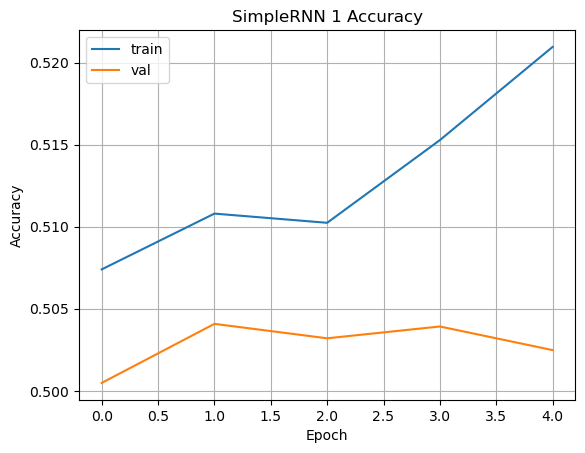

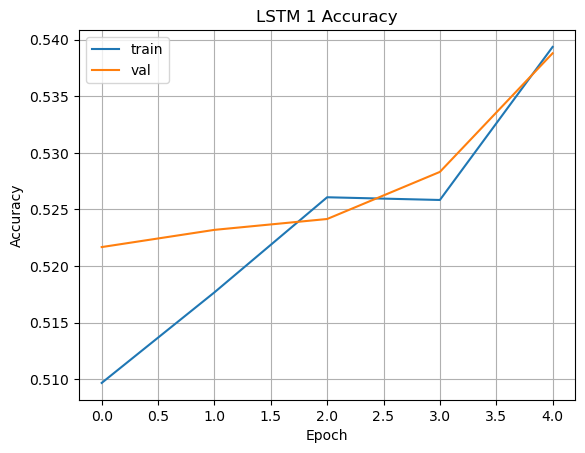

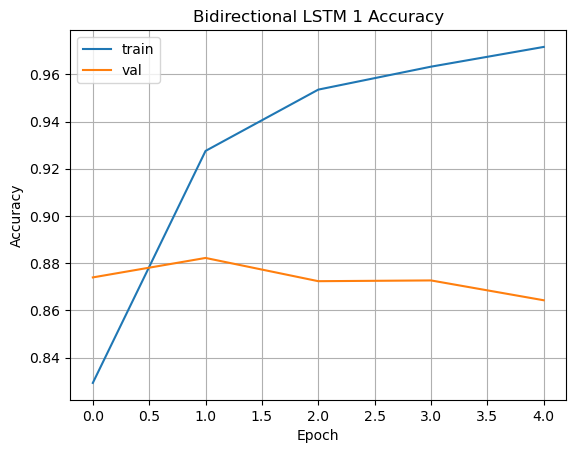

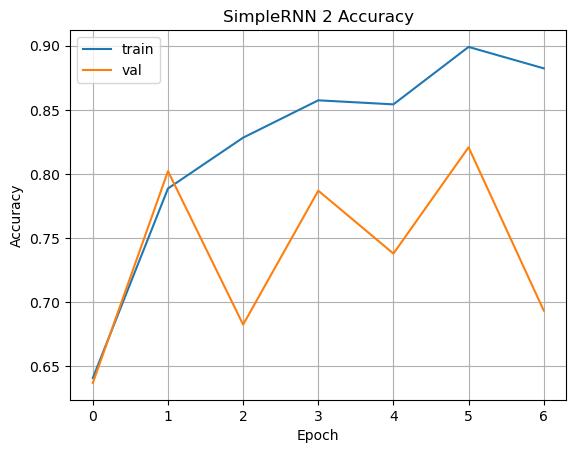

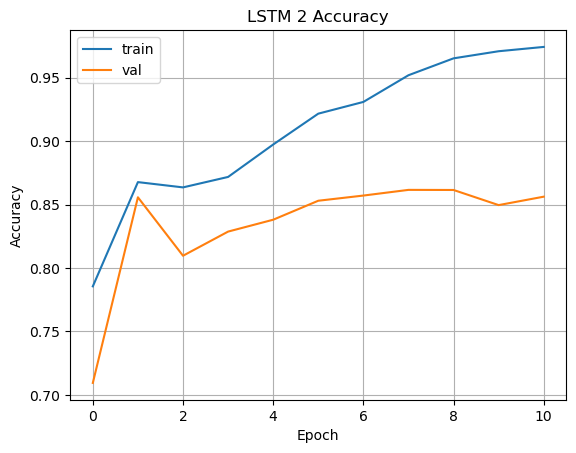

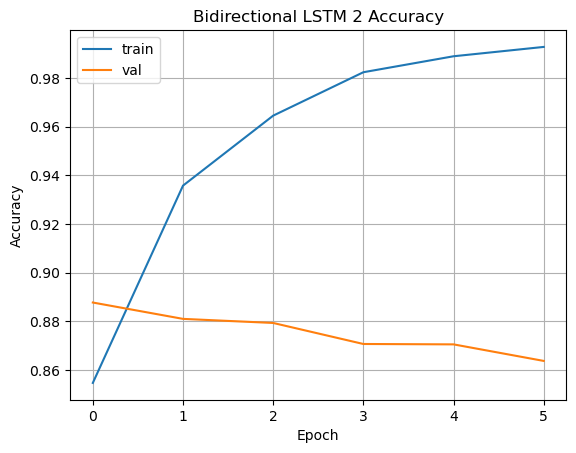

In [42]:
def plot_history(history, title):
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='val')
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_history(history_rnn, 'SimpleRNN 1 Accuracy')
plot_history(history_lstm, 'LSTM 1 Accuracy')
plot_history(history_bilstm, 'Bidirectional LSTM 1 Accuracy')
plot_history(history_rnn2, 'SimpleRNN 2 Accuracy')
plot_history(history_lstm2, 'LSTM 2 Accuracy')
plot_history(history_bilstm2, 'Bidirectional LSTM 2 Accuracy')

# Final evaluation and conclusions
In this section we show the final results on the test set. The main metric used is accuracy. We compare the performance of each architecture to assess which one generalizes better.

After training and validating each model, we now evaluate their performance on the final test set (`x_test_split`, `y_test_split`). This evaluation provides an unbiased estimate of how well each model generalizes to completely unseen data.

The reported accuracy values will help compare the effectiveness of each architecture:
* `SimpleRNN`: baseline performance using a basic recurrent unit.
* `LSTM`: expected to perform better thanks to its ability to capture long-term dependencies.
* `Bidirectional LSTM`: potentially best results due to its access to both past and future context.

The goal is to identify which model achieves the highest test accuracy and assess the trade-off between performance and model complexity.


In [43]:
print("Final Evaluation:")
print("SimpleRNN 1:", model_rnn.evaluate(x_test_split, y_test_split, verbose=0))
print("LSTM 1", model_lstm.evaluate(x_test_split, y_test_split, verbose=0))
print("Bidirectional LSTM 1:", model_bilstm.evaluate(x_test_split, y_test_split, verbose=0))
print("SimpleRNN 2:", model_rnn2.evaluate(x_test_split, y_test_split, verbose=0))
print("LSTM 2", model_lstm2.evaluate(x_test_split, y_test_split, verbose=0))
print("Bidirectional LSTM 2:", model_bilstm2.evaluate(x_test_split, y_test_split, verbose=0))

Final Evaluation:
SimpleRNN 1: [0.6929789185523987, 0.5030400156974792]
LSTM 1 [0.697300374507904, 0.5259199738502502]
Bidirectional LSTM 1: [0.45382174849510193, 0.8678399920463562]
SimpleRNN 2: [0.45122408866882324, 0.802079975605011]
LSTM 2 [0.367432564496994, 0.8551200032234192]
Bidirectional LSTM 2: [0.26379120349884033, 0.8920800089836121]


# Regularization Techniques in RNNs
In order to improve the generalization ability of recurrent neural networks and mitigate overfitting, we explore various weight regularization techniques applied to SIMPLE RNN and LSTM-based models. While dropout is a common approach for regularization, its performance in previous experiments did not significantly reduce overfitting. Therefore, we now focus on alternative methods: L1, L2, and L1_L2 (Elastic Net) regularization.

These techniques work by penalizing large weights during training, thus encouraging the model to learn simpler, more robust representations:
* L1 regularization: Encourages sparsity by adding the sum of absolute values of the weights to the loss function. It tends to push less useful weights to zero.
* L2 regularization: Penalizes large weights by adding the sum of squared weights to the loss. It promotes smaller, more uniformly distributed weights.
* L1_L2 regularization: Combines both penalties to benefit from sparsity and small weight magnitudes simultaneously.

Each model below uses the same architecture and training setup, differing only in the applied regularization technique.

In [44]:
from tensorflow.keras import regularizers

## SimpleRNN with L1 Regularization
This model applies L1 regularization to both the input and recurrent connections of the SimpleRNN layer. L1 regularization helps reduce model complexity by zeroing out less important weights, which can lead to sparser representations.

* Regularizer used: regularizers.l1(0.01)
* Expected effect: May reduce overfitting, but might slightly limit model capacity due to increased sparsity.
* Evaluation: Compared to the base model, performance is analyzed on the validation and test sets

In [45]:
l1_reg = regularizers.l1(0.01)

inputs_rnn_l1 = Input(shape=(seqLength,))
x_rnn_l1 = Embedding(maxFeatures, 64, mask_zero=True)(inputs_rnn_l1)
x_rnn_l1 = SimpleRNN(64, kernel_regularizer=l1_reg, recurrent_regularizer=l1_reg)(x_rnn_l1)
output_rnn_l1 = Dense(1, activation='sigmoid')(x_rnn_l1)

model_rnn_l1 = Model(inputs_rnn_l1, output_rnn_l1)
model_rnn_l1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_rnn_l1 = model_rnn_l1.fit(
    x_train_int, y_train,
    validation_data=(x_val_split, y_val_split),
    epochs=40,
    batch_size=32,
    callbacks=[early_stop]
)

print("SimpleRNN + L1 evaluation:", model_rnn_l1.evaluate(x_test_split, y_test_split, verbose=0))

Epoch 1/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - accuracy: 0.5228 - loss: 3.3083 - val_accuracy: 0.5202 - val_loss: 0.7017
Epoch 2/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.5107 - loss: 0.7024 - val_accuracy: 0.5202 - val_loss: 0.7017
Epoch 3/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 64ms/step - accuracy: 0.5138 - loss: 0.7023 - val_accuracy: 0.5202 - val_loss: 0.7017
Epoch 4/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 58ms/step - accuracy: 0.5186 - loss: 0.7019 - val_accuracy: 0.5202 - val_loss: 0.7015
Epoch 5/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 61ms/step - accuracy: 0.5184 - loss: 0.7015 - val_accuracy: 0.5202 - val_loss: 0.7012
Epoch 6/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 75ms/step - accuracy: 0.5202 - loss: 0.7014 - val_accuracy: 0.5202 - val_loss: 0.7013
Epoch 7/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.5093 - loss: 0.7019 - val_accuracy: 0.5202 - val_loss: 0.7010
Epoch 8/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.5185 - loss: 0.7012 - 

## SimpleRNN with L2 Regularization
Here, we apply L2 regularization (also known as ridge regularization) to the SimpleRNN layer. L2 penalizes large weights, encouraging the network to maintain small and stable values throughout training.

* Regularizer used: regularizers.l2(0.01)
* Expected effect: Leads to smoother convergence and improved generalization, especially on noisy data.
* Comparison goal: Analyze whether L2 outperforms L1 in maintaining performance while reducing overfitting.

In [46]:
l2_reg = regularizers.l2(0.01)

inputs_rnn_l2 = Input(shape=(seqLength,))
x_rnn_l2 = Embedding(maxFeatures, 64, mask_zero=True)(inputs_rnn_l2)
x_rnn_l2 = SimpleRNN(64, kernel_regularizer=l2_reg, recurrent_regularizer=l2_reg)(x_rnn_l2)
output_rnn_l2 = Dense(1, activation='sigmoid')(x_rnn_l2)

model_rnn_l2 = Model(inputs_rnn_l2, output_rnn_l2)
model_rnn_l2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_rnn_l2 = model_rnn_l2.fit(
    x_train_int, y_train,
    validation_data=(x_val_split, y_val_split),
    epochs=40,
    batch_size=32,
    callbacks=[early_stop]
)

print("SimpleRNN + L2 evaluation:", model_rnn_l2.evaluate(x_test_split, y_test_split, verbose=0))

Epoch 1/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.6520 - loss: 1.1458 - val_accuracy: 0.6241 - val_loss: 0.7774
Epoch 2/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.6782 - loss: 0.7040 - val_accuracy: 0.7507 - val_loss: 0.6277
Epoch 3/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 105ms/step - accuracy: 0.7451 - loss: 0.6360 - val_accuracy: 0.5944 - val_loss: 0.7421
Epoch 4/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 102s 53ms/step - accuracy: 0.7232 - loss: 0.6473 - val_accuracy: 0.8090 - val_loss: 0.5317
Epoch 5/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 71ms/step - accuracy: 0.7724 - loss: 0.5749 - val_accuracy: 0.7574 - val_loss: 0.5922
Epoch 6/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.8114 - loss: 0.4939 - val_accuracy: 0.7633 - val_loss: 0.5711
Epoch 7/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.8368 - loss: 0.4429 - val_accuracy: 0.8301 - val_loss: 0.4725
Epoch 8/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.8654 - loss: 0.3694 

## SimpleRNN with L1_L2 Regularization
This final variant combines both L1 and L2 regularization techniques through the l1_l2 penalty. It attempts to benefit from the sparsity of L1 and the weight smoothing of L2 simultaneously.

* Regularizer used: regularizers.l1_l2(l1=0.01, l2=0.01)
* Expected effect: Strikes a balance between pruning irrelevant weights and regularizing important ones.
* Evaluation: This model is often a good compromise when neither L1 nor L2 alone gives optimal results.

In [47]:
l1_l2_reg = regularizers.l1_l2(l1=0.01, l2=0.01)

inputs_rnn_l1l2 = Input(shape=(seqLength,))
x_rnn_l1l2 = Embedding(maxFeatures, 64, mask_zero=True)(inputs_rnn_l1l2)
x_rnn_l1l2 = SimpleRNN(64, kernel_regularizer=l1_l2_reg, recurrent_regularizer=l1_l2_reg)(x_rnn_l1l2)
output_rnn_l1l2 = Dense(1, activation='sigmoid')(x_rnn_l1l2)

model_rnn_l1l2 = Model(inputs_rnn_l1l2, output_rnn_l1l2)
model_rnn_l1l2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_rnn_l1l2 = model_rnn_l1l2.fit(
    x_train_int, y_train,
    validation_data=(x_val_split, y_val_split),
    epochs=40,
    batch_size=32,
    callbacks=[early_stop]
)

print("SimpleRNN + L1_L2 evaluation:", model_rnn_l1l2.evaluate(x_test_split, y_test_split, verbose=0))

Epoch 1/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.5299 - loss: 3.6859 - val_accuracy: 0.5202 - val_loss: 0.7016
Epoch 2/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.5149 - loss: 0.7025 - val_accuracy: 0.5202 - val_loss: 0.7021
Epoch 3/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.5169 - loss: 0.7022 - val_accuracy: 0.5202 - val_loss: 0.7018
Epoch 4/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 99ms/step - accuracy: 0.5195 - loss: 0.7019 - val_accuracy: 0.5202 - val_loss: 0.7020
Epoch 5/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 95s 122ms/step - accuracy: 0.5153 - loss: 0.7022 - val_accuracy: 0.5202 - val_loss: 0.7014
Epoch 6/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 107ms/step - accuracy: 0.5208 - loss: 0.7016 - val_accuracy: 0.5202 - val_loss: 0.7018
Epoch 7/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 86ms/step - accuracy: 0.5098 - loss: 0.7020 - val_accuracy: 0.5202 - val_loss: 0.7014
Epoch 8/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 76ms/step - accuracy: 0.5135 - loss: 0.7019 

## LSTM with L1 Regularization
In this model, we apply L1 regularization to both the input and recurrent connections of the LSTM layer. This encourages the model to zero out less relevant weights, promoting sparsity in the learned representation.

* Regularizer: regularizers.l1(0.01)
* Expected effect: May reduce overfitting by simplifying the model, though sometimes at the cost of slightly reduced performance.
* Training: Same number of epochs and validation strategy as in previous models.

In [48]:
l1_reg = regularizers.l1(0.01)

inputs_l1 = Input(shape=(seqLength,))
x_l1 = Embedding(input_dim=maxFeatures, output_dim=64, mask_zero=True)(inputs_l1)
x_l1 = LSTM(64, kernel_regularizer=l1_reg, recurrent_regularizer=l1_reg)(x_l1)
output_l1 = Dense(1, activation='sigmoid')(x_l1)

model_l1 = Model(inputs_l1, output_l1)
model_l1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_l1 = model_l1.fit(
    x_train_int, y_train,
    validation_data=(x_val_split, y_val_split),
    epochs=40,
    batch_size=32,
    callbacks=[early_stop]
)

print("LSTM + L1 evaluation:", model_l1.evaluate(x_test_split, y_test_split, verbose=0))

Epoch 1/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 75ms/step - accuracy: 0.5181 - loss: 4.6233 - val_accuracy: 0.5202 - val_loss: 0.7320
Epoch 2/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 2369s 3s/step - accuracy: 0.5143 - loss: 0.7320 - val_accuracy: 0.5202 - val_loss: 0.7310
Epoch 3/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 76ms/step - accuracy: 0.5163 - loss: 0.7315 - val_accuracy: 0.5202 - val_loss: 0.7313
Epoch 4/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 71ms/step - accuracy: 0.5158 - loss: 0.7314 - val_accuracy: 0.5202 - val_loss: 0.7304
Epoch 5/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 54s 69ms/step - accuracy: 0.5088 - loss: 0.7314 - val_accuracy: 0.5202 - val_loss: 0.7310
Epoch 6/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 64ms/step - accuracy: 0.5244 - loss: 0.7305 - val_accuracy: 0.5202 - val_loss: 0.7310
Epoch 7/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 64ms/step - accuracy: 0.5132 - loss: 0.7310 - val_accuracy: 0.5202 - val_loss: 0.7309
Epoch 8/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 51s 65ms/step - accuracy: 0.5154 - loss: 0.7309 - 

## LSTM with L2 Regularization
Here, we apply L2 regularization, also known as ridge regularization, which penalizes large weight values but keeps them close to zero rather than eliminating them entirely. It leads to smoother and more stable weight distributions.

* Regularizer: regularizers.l2(0.01)
* Expected effect: Can improve generalization without heavily impacting the model's capacity.
* Training setup: Identical to the L1 version for a fair comparison.

In [49]:
l2_reg = regularizers.l2(0.01)

inputs_l2 = Input(shape=(seqLength,))
x_l2 = Embedding(input_dim=maxFeatures, output_dim=64, mask_zero=True)(inputs_l2)
x_l2 = LSTM(64, kernel_regularizer=l2_reg, recurrent_regularizer=l2_reg)(x_l2)
output_l2 = Dense(1, activation='sigmoid')(x_l2)

model_l2 = Model(inputs_l2, output_l2)
model_l2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_l2 = model_l2.fit(
    x_train_int, y_train,
    validation_data=(x_val_split, y_val_split),
    epochs=40,
    batch_size=32,
    callbacks=[early_stop]
)

print("LSTM + L2 evaluation:", model_l2.evaluate(x_test_split, y_test_split, verbose=0))

Epoch 1/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 60ms/step - accuracy: 0.7060 - loss: 0.8418 - val_accuracy: 0.8419 - val_loss: 0.3922
Epoch 2/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.9123 - loss: 0.2622 - val_accuracy: 0.8611 - val_loss: 0.3499
Epoch 3/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 59ms/step - accuracy: 0.9401 - loss: 0.1935 - val_accuracy: 0.8590 - val_loss: 0.3491
Epoch 4/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 59ms/step - accuracy: 0.9513 - loss: 0.1596 - val_accuracy: 0.8632 - val_loss: 0.4182
Epoch 5/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 61ms/step - accuracy: 0.9614 - loss: 0.1360 - val_accuracy: 0.8350 - val_loss: 0.4394
Epoch 6/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 63ms/step - accuracy: 0.9676 - loss: 0.1165 - val_accuracy: 0.8399 - val_loss: 0.5050
Epoch 7/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 49s 63ms/step - accuracy: 0.9744 - loss: 0.0933 - val_accuracy: 0.8456 - val_loss: 0.5614
Epoch 8/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 59ms/step - accuracy: 0.9743 - loss: 0.0961 - 

## LSTM with L1_L2 Regularization
In this final model, we combine L1 and L2 penalties in a single L1_L2 regularizer. This hybrid approach allows us to benefit from the sparsity-inducing behavior of L1 and the stabilizing effect of L2.

* Regularizer: regularizers.l1_l2(l1=0.01, l2=0.01)
* Expected effect: Offers a balance between weight pruning and smooth generalization.
* Use case: Often preferred when neither L1 nor L2 alone yields optimal results.

In [50]:
l1_l2_reg = regularizers.l1_l2(l1=0.01, l2=0.01)

inputs_l1l2 = Input(shape=(seqLength,))
x_l1l2 = Embedding(input_dim=maxFeatures, output_dim=64, mask_zero=True)(inputs_l1l2)
x_l1l2 = LSTM(64, kernel_regularizer=l1_l2_reg, recurrent_regularizer=l1_l2_reg)(x_l1l2)
output_l1l2 = Dense(1, activation='sigmoid')(x_l1l2)

model_l1l2 = Model(inputs_l1l2, output_l1l2)
model_l1l2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_l1l2 = model_l1l2.fit(
    x_train_int, y_train,
    validation_data=(x_val_split, y_val_split),
    epochs=40,
    batch_size=32,
    callbacks=[early_stop]
)

print("LSTM + L1_L2 evaluation:", model_l1l2.evaluate(x_test_split, y_test_split, verbose=0))

Epoch 1/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 66ms/step - accuracy: 0.5208 - loss: 4.9403 - val_accuracy: 0.5202 - val_loss: 0.7319
Epoch 2/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.5176 - loss: 0.7326 - val_accuracy: 0.5202 - val_loss: 0.7323
Epoch 3/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 49s 62ms/step - accuracy: 0.5155 - loss: 0.7328 - val_accuracy: 0.5202 - val_loss: 0.7326
Epoch 4/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.5196 - loss: 0.7328 - val_accuracy: 0.5202 - val_loss: 0.7326
Epoch 5/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 61ms/step - accuracy: 0.5143 - loss: 0.7332 - val_accuracy: 0.5202 - val_loss: 0.7327
Epoch 6/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.5165 - loss: 0.7330 - val_accuracy: 0.5202 - val_loss: 0.7326
LSTM + L1_L2 evaluation: [0.73276686668396, 0.5072000026702881]


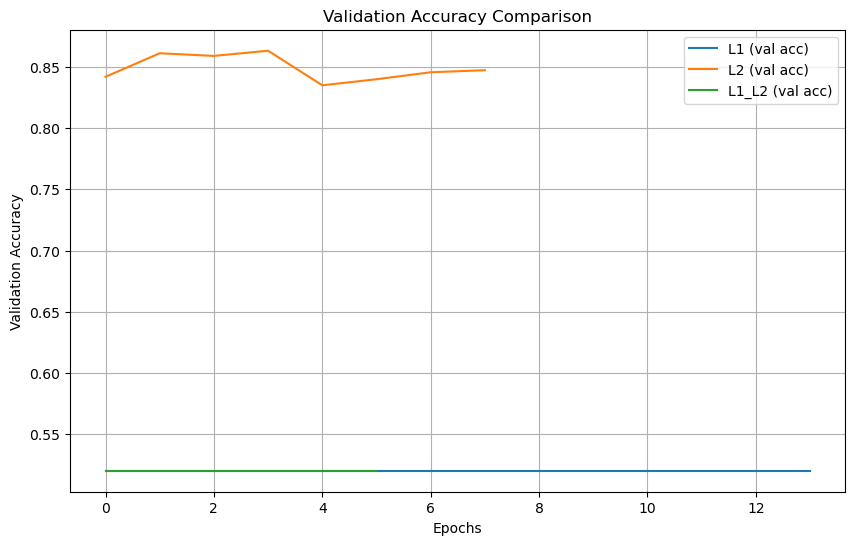

In [51]:
def plot_history_comparison(histories, labels):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 6))
    for history, label in zip(histories, labels):
        plt.plot(history.history['val_accuracy'], label=f"{label} (val acc)")
    plt.xlabel("Epochs")
    plt.ylabel("Validation Accuracy")
    plt.title("Validation Accuracy Comparison")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_history_comparison(
    [history_l1, history_l2, history_l1l2],
    ["L1", "L2", "L1_L2"]
)